# Imports Library

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import pickle
import joblib

warnings.filterwarnings("ignore")

%matplotlib inline


# Downloading Datasets

In [30]:
import os
from six.moves import urllib

download_dir = "./"

download_url = "https://raw.githubusercontent.com/manishkr1754/CarDekho_Used_Car_Price_Prediction/main/notebooks/data/cardekho_dataset.csv"

os.makedirs(download_dir,exist_ok=True)

filename = os.path.basename(download_url)

download_file_path = os.path.join(download_dir, filename)

urllib.request.urlretrieve(download_url, download_file_path)

print('-'*100)
print('Data with name ' + filename + ' Downloaded at ' + download_file_path)
print('-'*100)


----------------------------------------------------------------------------------------------------
Data with name cardekho_dataset.csv Downloaded at ./cardekho_dataset.csv
----------------------------------------------------------------------------------------------------


# Access Dataframe and Analysing It

In [31]:
df=pd.read_csv("cardekho_dataset.csv")
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
inputs=df.copy()
inputs.drop('selling_price', axis=1, inplace=True)

In [32]:
df.head()

,id,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [33]:
inputs.head()

,id,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [34]:
inputs.shape

(15411, 13)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [36]:
df.describe()

,id,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [37]:
num_cols=inputs.select_dtypes(include=np.number).columns.tolist()
cat_cols=inputs.select_dtypes('object').columns.tolist()

In [38]:
num_cols

['id', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

# EDA

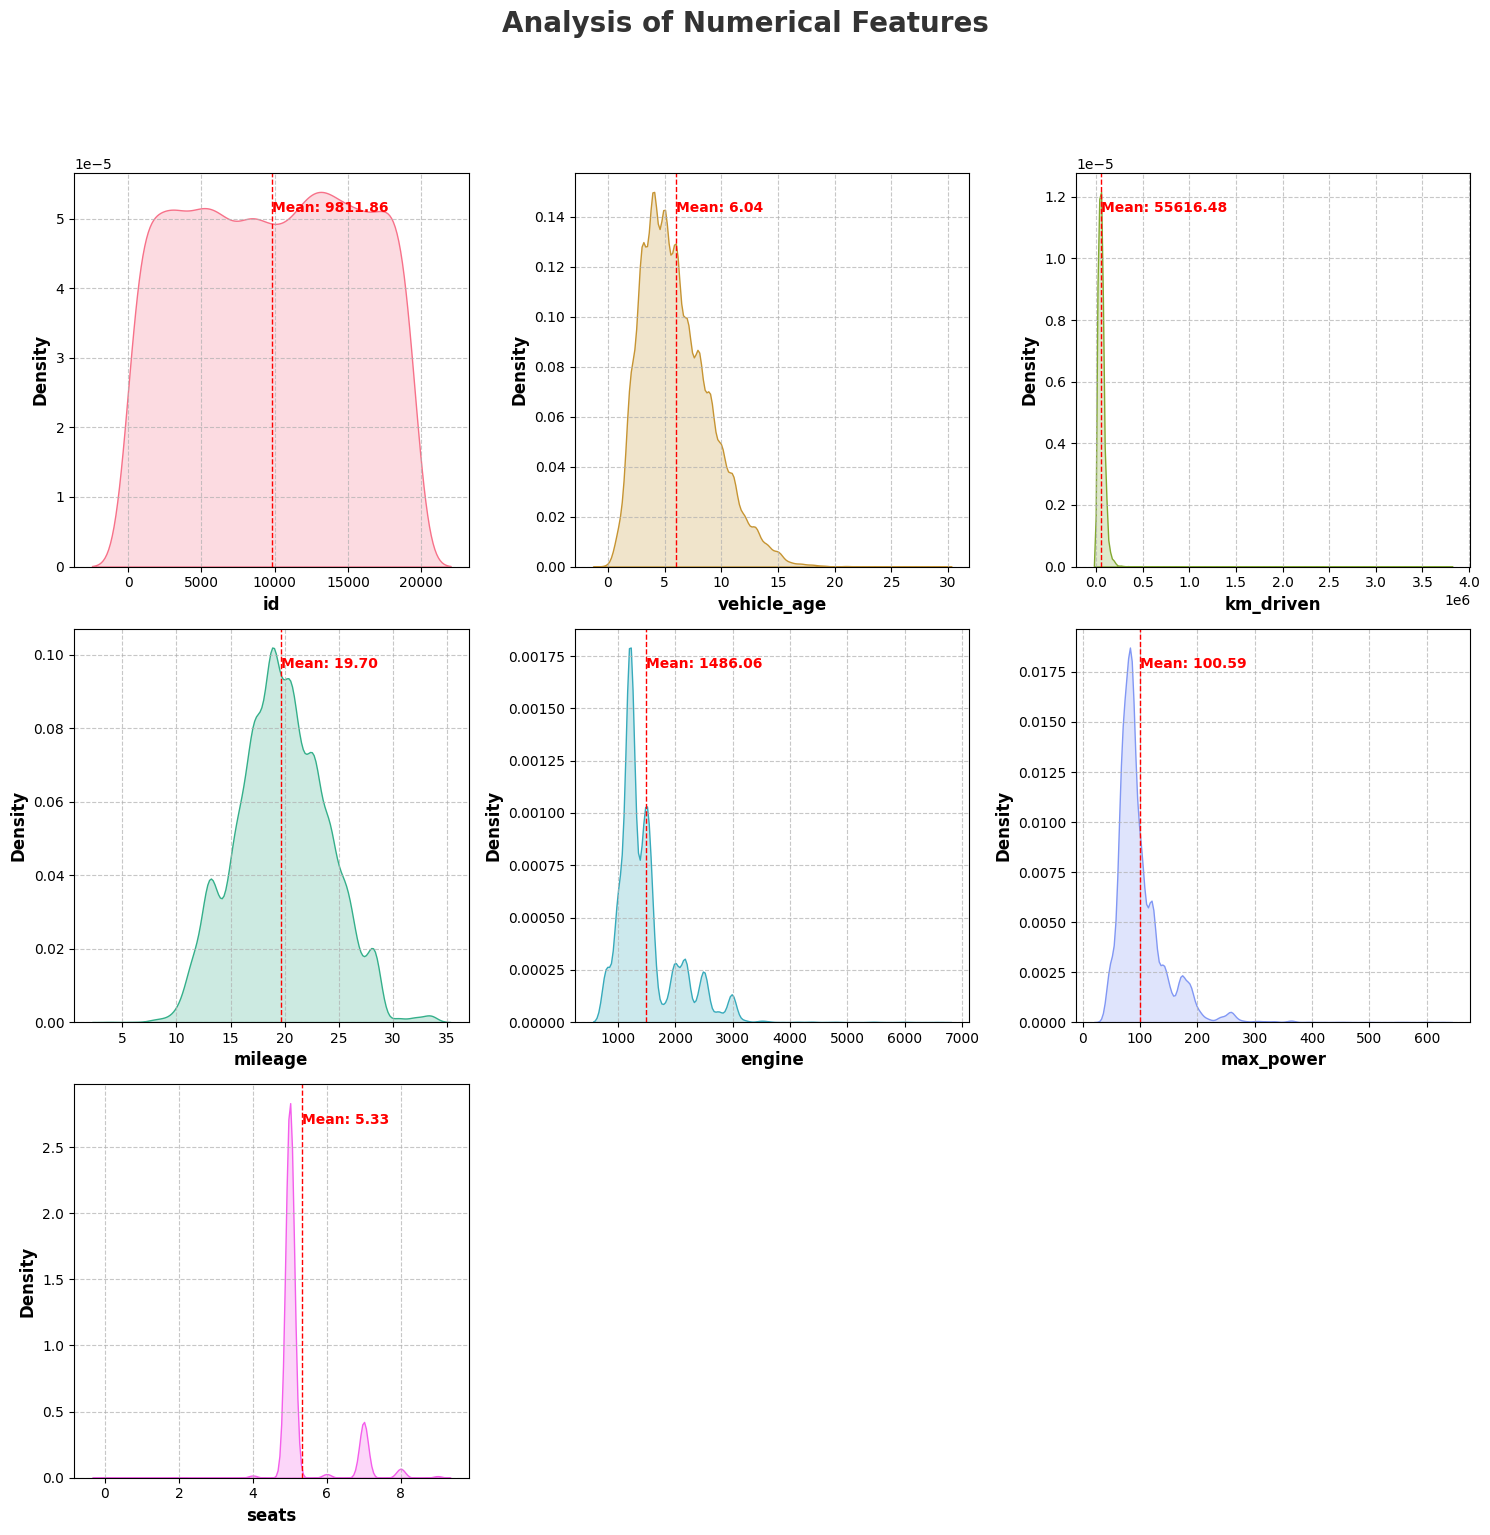

In [39]:
plt.figure(figsize=(15, 15))
plt.suptitle('Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

colors = sns.color_palette('husl', len(num_cols))  

for i in range(len(num_cols)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[num_cols[i]], shade=True, color=colors[i])
    mean_value = df[num_cols[i]].mean()
    
    plt.axvline(mean_value, color='r', linestyle='--', linewidth=1)
    plt.text(mean_value, plt.ylim()[1]*0.9, f'Mean: {mean_value:.2f}', color='r', fontsize=10, fontweight='bold')
    
    plt.xlabel(num_cols[i], fontsize=12, fontweight='bold')
    plt.ylabel('Density', fontsize=12, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout(rect=[0, 0, 1, 0.96]) 

plt.show()

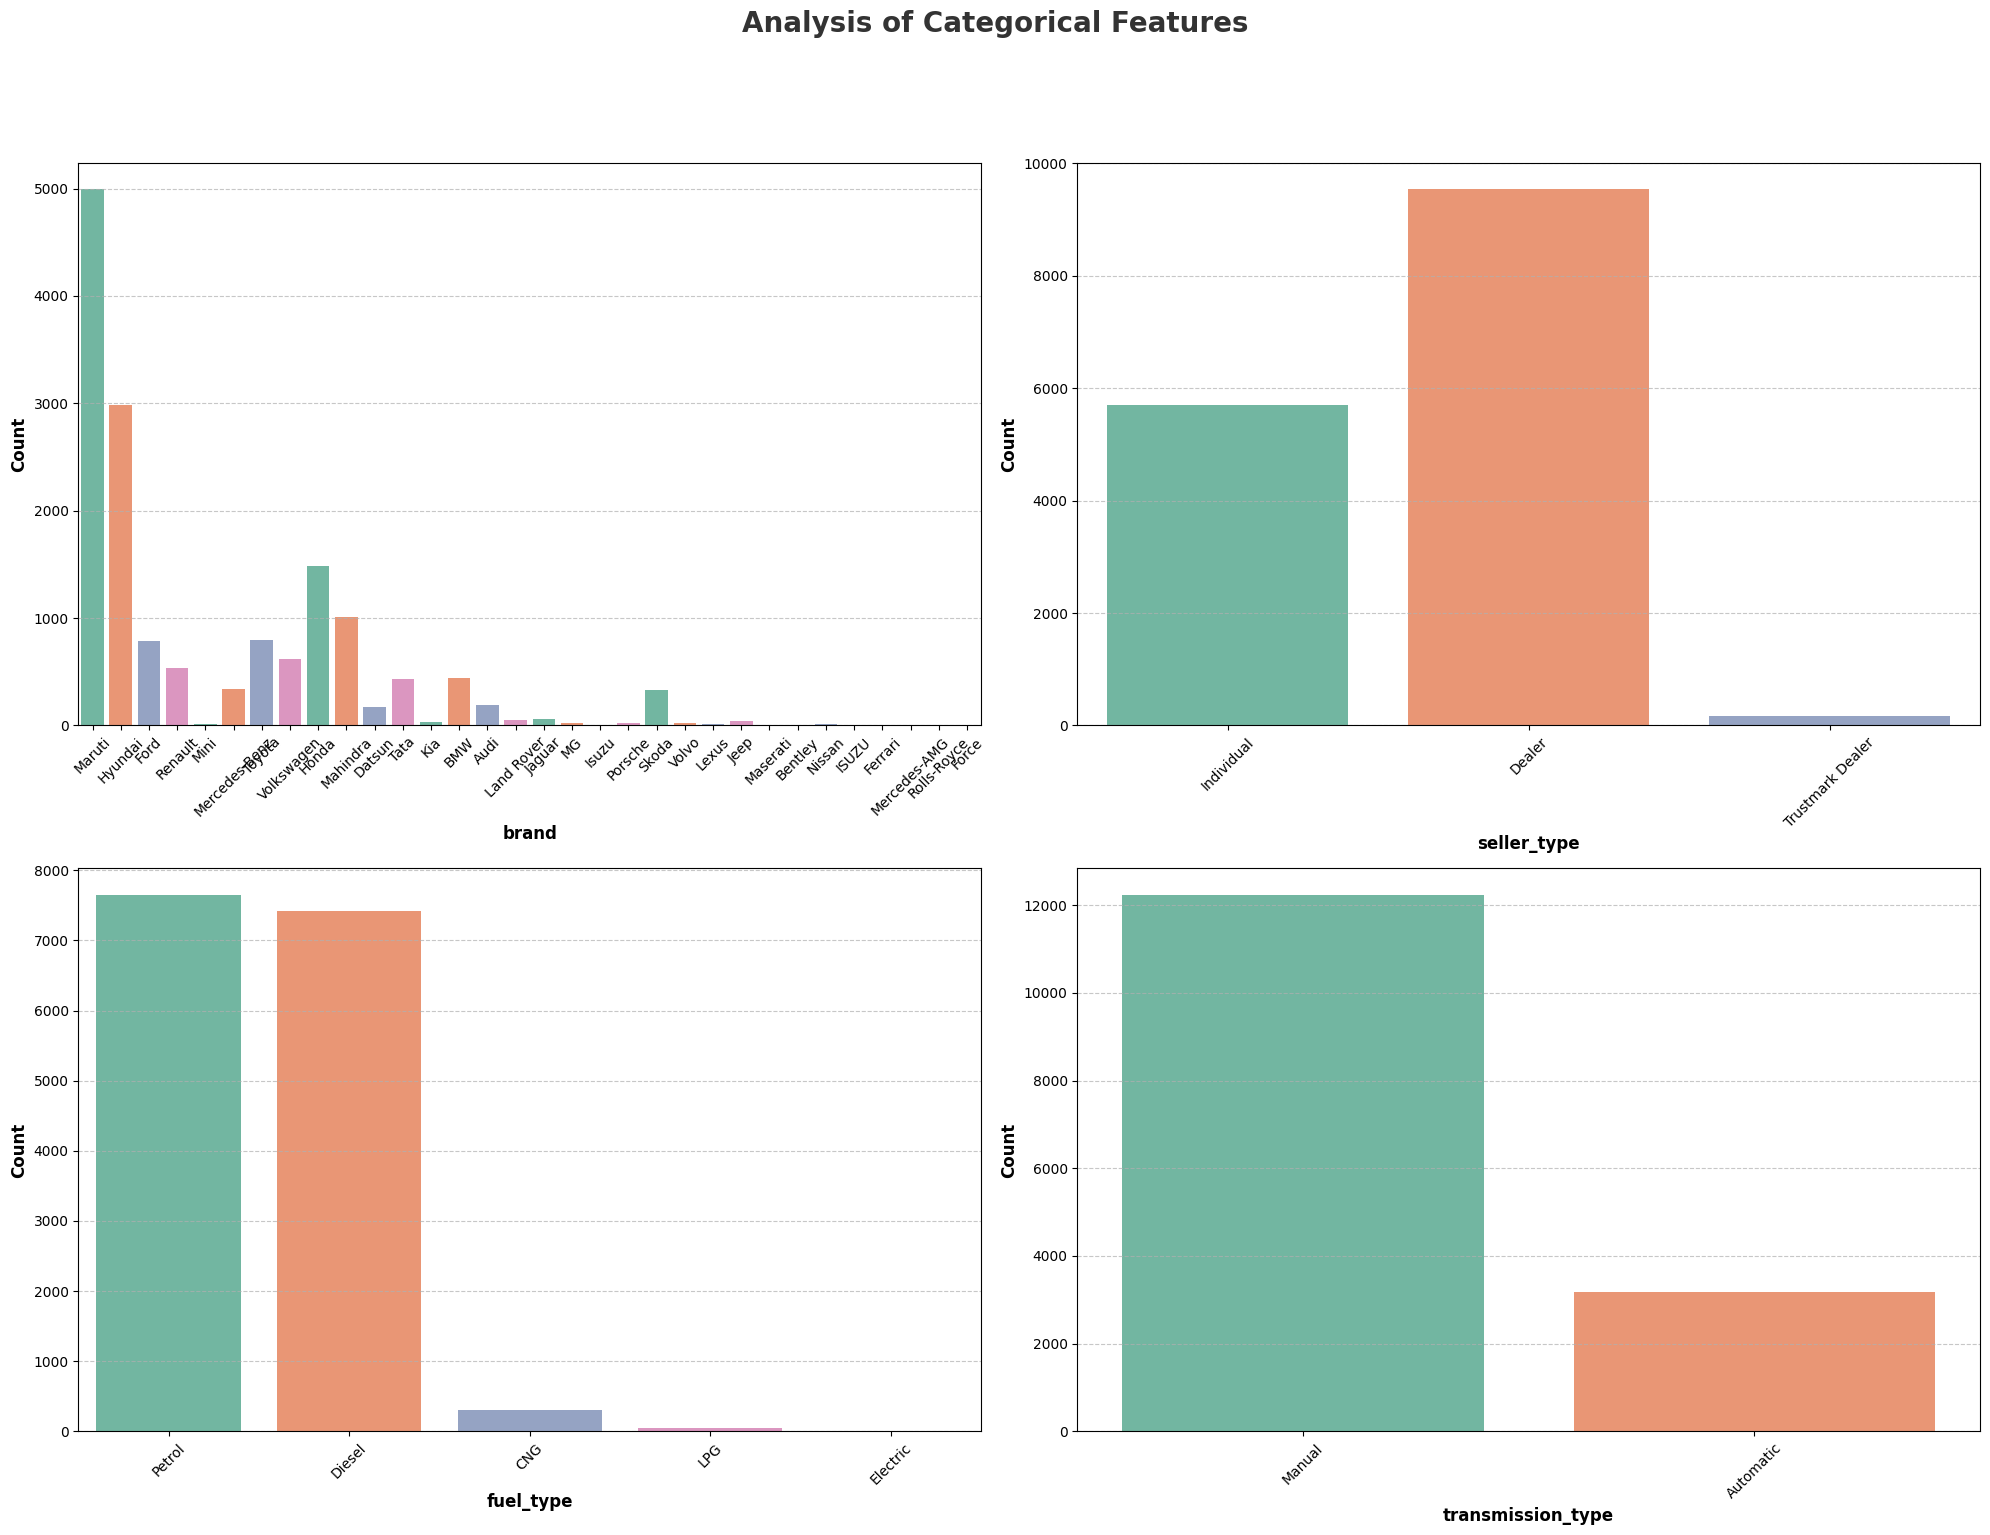

In [40]:
plt.figure(figsize=(20, 15))
plt.suptitle('Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

cat1 = ['brand', 'seller_type', 'fuel_type', 'transmission_type']
colors = sns.color_palette('Set2', len(cat1))  

for i in range(len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]], palette=colors)
    plt.xlabel(cat1[i], fontsize=12, fontweight='bold')
    plt.ylabel('Count', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  

plt.show()

# Data Preprocessing

In [41]:
df.isna().sum().sort_values(ascending=True)

id                   0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [42]:
# No need to impute

In [43]:
df.head()

,id,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


# Handling Categorical Data

In [44]:
len(df['model'].unique().tolist())

120

In [45]:
print(num_cols,'  ',cat_cols)

['id', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']    ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [46]:
inputs.head()
inputs=inputs.drop('car_name',axis=1)

In [47]:
df.head()

,id,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [48]:
inputs = pd.get_dummies(inputs, columns=['model','seller_type','fuel_type','transmission_type'])

inputs.head()

,id,brand,vehicle_age,km_driven,mileage,engine,max_power,seats,model_3,model_5,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,0,Maruti,9,120000,19.70,796,46.30,5,False,False,...,False,True,False,False,False,False,False,True,False,True
1,1,Hyundai,5,20000,18.90,1197,82.00,5,False,False,...,False,True,False,False,False,False,False,True,False,True
2,2,Hyundai,11,60000,17.00,1197,80.00,5,False,False,...,False,True,False,False,False,False,False,True,False,True
3,3,Maruti,9,37000,20.92,998,67.10,5,False,False,...,False,True,False,False,False,False,False,True,False,True
4,4,Ford,6,30000,22.77,1498,98.59,5,False,False,...,True,False,False,False,True,False,False,False,False,True


In [49]:
inputs=inputs.drop(['id','brand'],axis=1)

In [50]:
columns=inputs.columns.tolist()

# Training the Model

In [51]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.model_selection import cross_val_score

In [52]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(inputs,df['selling_price'], test_size=0.2)

In [53]:
models = [ LinearRegression, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []
m_cv_s=[]
s_cv_s=[]

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    cv_scores = cross_val_score(regressor, X_train,y_train, cv=5, scoring='neg_mean_squared_error')

    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))
    m_cv_s.append(-cv_scores.mean())
    s_cv_s.append(cv_scores.std())
    

In [54]:
model_summary=pd.DataFrame({"Model":[ 'LR', 'DTR','RF', 'Ridge', 'Lasso'],
                         "Mean Squarred Error":mse,
                         "Root Mean Squarred Error":rmse,
                         "Explained Variance Score":evs,
                         "R-Sqaure Score(Accuracy)":r_square_score,
                         'Mean CV MSE': m_cv_s,
                         'Std CV MSE': s_cv_s})

In [55]:
model_summary

,Model,Mean Squarred Error,Root Mean Squarred Error,Explained Variance Score,R-Sqaure Score(Accuracy),Mean CV MSE,Std CV MSE
0,LR,1.475381e+11,384106.919928,0.749154,0.748923,2.684082e+11,1.933120e+11
1,DTR,6.416126e+11,801007.260342,-0.090598,-0.091882,1.684550e+11,1.085970e+11
2,RF,1.162736e+11,340989.157705,0.802383,0.802128,1.285410e+11,1.242735e+11
3,Ridge,1.690697e+11,411180.898542,0.712616,0.712281,2.541109e+11,1.691884e+11
4,Lasso,1.476386e+11,384237.737023,0.748984,0.748752,2.804626e+11,2.039065e+11


In [56]:
dtr_model = RandomForestRegressor().fit(X_train, y_train)
joblib.dump(dtr_model, 'dtr_model.pkl')

['dtr_model.pkl']

In [57]:
"""
	Model	Mean Squarred Error	Root Mean Squarred Error	Explained Variance Score	R-Sqaure Score(Accuracy)	Mean CV MSE	Std CV MSE
0	LR	4.663436e+11	6.828935e+05	0.578007	0.577985	2.209577e+11	5.438190e+10
1	SVM	1.148602e+12	1.071729e+06	0.000777	-0.039422	7.693483e+11	1.513055e+11
2	DTR	1.440606e+11	3.795532e+05	0.869636	0.869633	9.925305e+10	2.851791e+10
3	RF	2.202126e+11	4.692681e+05	0.800722	0.800720	6.321270e+10	3.203376e+10
4	Ridge	4.663421e+11	6.828924e+05	0.578008	0.577986	2.209521e+11	5.439137e+10
5	Lasso	4.663428e+11	6.828930e+05	0.578007	0.577985	2.209569e+11	5.438195e+10
"""

'\n\tModel\tMean Squarred Error\tRoot Mean Squarred Error\tExplained Variance Score\tR-Sqaure Score(Accuracy)\tMean CV MSE\tStd CV MSE\n0\tLR\t4.663436e+11\t6.828935e+05\t0.578007\t0.577985\t2.209577e+11\t5.438190e+10\n1\tSVM\t1.148602e+12\t1.071729e+06\t0.000777\t-0.039422\t7.693483e+11\t1.513055e+11\n2\tDTR\t1.440606e+11\t3.795532e+05\t0.869636\t0.869633\t9.925305e+10\t2.851791e+10\n3\tRF\t2.202126e+11\t4.692681e+05\t0.800722\t0.800720\t6.321270e+10\t3.203376e+10\n4\tRidge\t4.663421e+11\t6.828924e+05\t0.578008\t0.577986\t2.209521e+11\t5.439137e+10\n5\tLasso\t4.663428e+11\t6.828930e+05\t0.578007\t0.577985\t2.209569e+11\t5.438195e+10\n'

In [58]:
brand_name = [
    'Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes-Benz',
    'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata',
    'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu',
    'Porsche', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Maserati',
    'Bentley', 'Nissan', 'ISUZU', 'Ferrari', 'Mercedes-AMG',
    'Rolls-Royce', 'Force']

In [59]:
for a in df['brand'].unique():
    print(f"{a}_brand = {df.loc[df['brand'] == a, 'model'].unique().tolist()}")


Maruti_brand = ['Alto', 'Wagon R', 'Swift', 'Ciaz', 'Baleno', 'Swift Dzire', 'Ignis', 'Vitara', 'Celerio', 'Ertiga', 'Eeco', 'Dzire VXI', 'XL6', 'S-Presso', 'Dzire LXI', 'Dzire ZXI']
Hyundai_brand = ['Grand', 'i20', 'i10', 'Venue', 'Verna', 'Creta', 'Santro', 'Elantra', 'Aura', 'Tucson']
Ford_brand = ['Ecosport', 'Aspire', 'Figo', 'Endeavour', 'Freestyle']
Renault_brand = ['Duster', 'KWID', 'Triber']
Mini_brand = ['Cooper']
Mercedes-Benz_brand = ['C-Class', 'E-Class', 'GL-Class', 'S-Class', 'CLS', 'GLS']
Toyota_brand = ['Innova', 'Fortuner', 'Camry', 'Yaris', 'Glanza']
Volkswagen_brand = ['Vento', 'Polo']
Honda_brand = ['City', 'Amaze', 'CR-V', 'Jazz', 'Civic', 'WR-V', 'CR']
Mahindra_brand = ['Bolero', 'XUV500', 'KUV100', 'Scorpio', 'Marazzo', 'KUV', 'Thar', 'XUV300', 'Alturas']
Datsun_brand = ['RediGO', 'GO', 'redi-GO']
Tata_brand = ['Tiago', 'Tigor', 'Safari', 'Hexa', 'Nexon', 'Harrier', 'Altroz']
Kia_brand = ['Seltos', 'Carnival']
BMW_brand = ['5', '3', 'Z4', '6', 'X5', 'X1', '7', '

In [60]:
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes-Benz',
       'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata',
       'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu',
       'Porsche', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Maserati',
       'Bentley', 'Nissan', 'ISUZU', 'Ferrari', 'Mercedes-AMG',
       'Rolls-Royce', 'Force'], dtype=object)